# Car Price Prediction Project

### Import Labraries

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

### Data Collection and Preprocessing

In [94]:
dataset = pd.read_csv('car data.csv')
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [96]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [97]:
#checking distribution of catagorical values
print(dataset.Fuel_Type.value_counts(),'\n')
print(dataset.Seller_Type.value_counts(),'\n')
print(dataset.Transmission.value_counts(),'\n')

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64 



### Encoding the Catagorical Data

In [98]:
le = LabelEncoder()
dataset['Fuel_Type'] = le.fit_transform(dataset['Fuel_Type'])
dataset['Seller_Type'] = le.fit_transform(dataset['Seller_Type'])
dataset['Transmission'] = le.fit_transform(dataset['Transmission'])

In [99]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


### Splitting data into Training and Testing Data

In [100]:
X = dataset.drop(['Car_Name','Selling_Price'],axis=1) 
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [101]:
Y = dataset['Selling_Price']
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1,random_state=2, )

### Model Training

#### 1. Linear Regression

In [103]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

#### Model Evaluation

In [104]:
prediction = lin_reg_model.predict(X_train)

In [105]:
# R squared error
error_score = metrics.r2_score(Y_train, prediction)
print ("R2 squared Error", error_score)

R2 squared Error 0.879945166049371


#### Visualizing the actual and the predicted prices

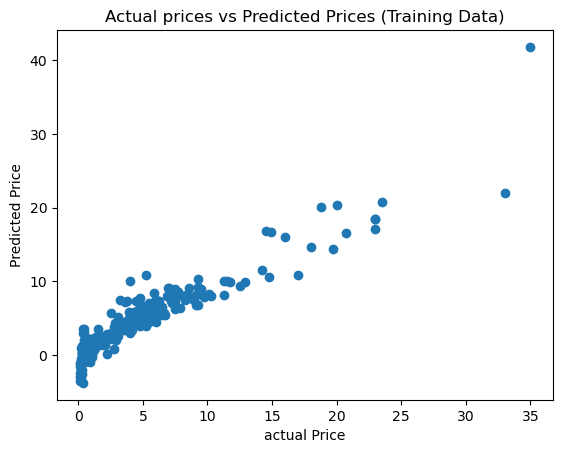

In [106]:
plt.scatter(Y_train, prediction)
plt.xlabel("actual Price")
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted Prices (Training Data)')
plt.show()

In [107]:
#prediction on testing
test_data_prediction = lin_reg_model.predict(X_test)

In [108]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print ("R2 squared Error", error_score)

R2 squared Error 0.8365766715025804


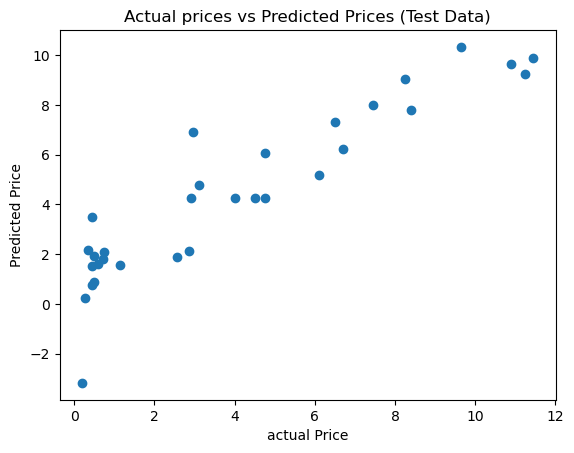

In [109]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("actual Price")
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted Prices (Test Data)')
plt.show()

#### 2. Lasso Regression

In [110]:
lass_reg_model = Lasso()

In [111]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

#### Model Evaluation

In [112]:
Training_data_prediction = lass_reg_model.predict(X_train)

In [113]:
# R squared error
error_score = metrics.r2_score(Y_train, Training_data_prediction)
print ("R2 squared Error", error_score)

R2 squared Error 0.8427856123435794


#### Visualizing the actual and the predicted prices

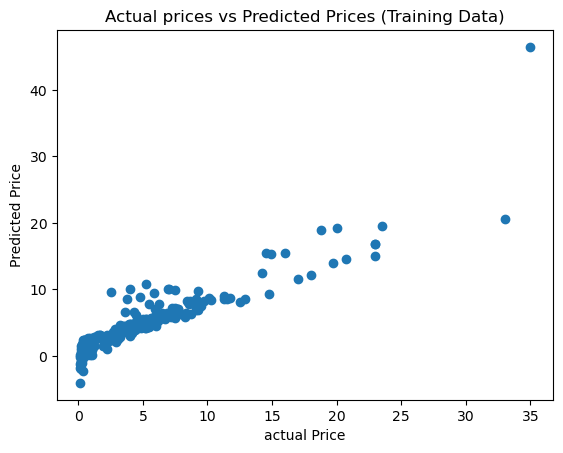

In [114]:
plt.scatter(Y_train, Training_data_prediction)
plt.xlabel("actual Price")
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted Prices (Training Data)')
plt.show()

In [115]:
#prediction on testing
test_data_prediction = lass_reg_model.predict(X_test)

In [116]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print ("R2 squared Error", error_score)

R2 squared Error 0.8709167941173195


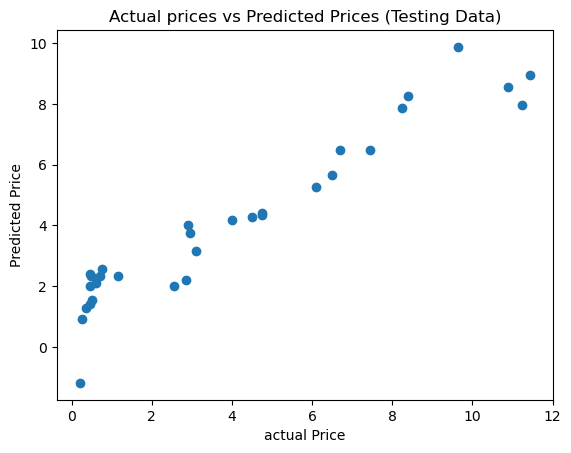

In [117]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("actual Price")
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted Prices (Testing Data)')
plt.show()

#### 3. Decision tree

In [145]:
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)

In [147]:
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

#### Model evaluation

In [151]:
Training_data_prediction1 = random_forest_model.predict(X_train)

In [153]:
# R squared error
error_score = metrics.r2_score(Y_train, Training_data_prediction1)
print ("R2 squared Error", error_score)

R2 squared Error 0.984781761260328


#### Visualizing the actual and the predicted prices

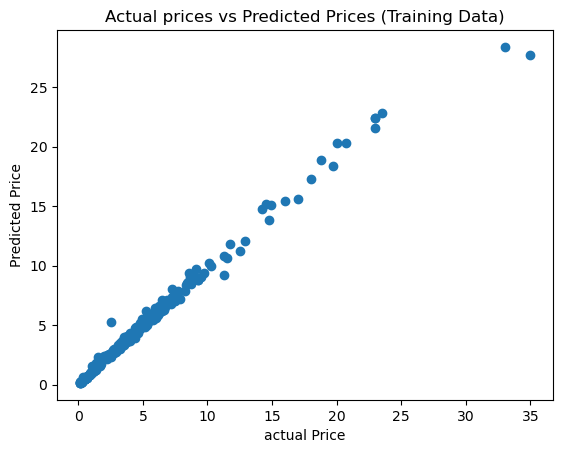

In [154]:
plt.scatter(Y_train, Training_data_prediction1)
plt.xlabel("actual Price")
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted Prices (Training Data)')
plt.show()

In [156]:
#testing
test_data_prediction1 = random_forest_model.predict(X_test)

In [157]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction1)
print ("R2 squared Error", error_score)

R2 squared Error 0.980532707844806


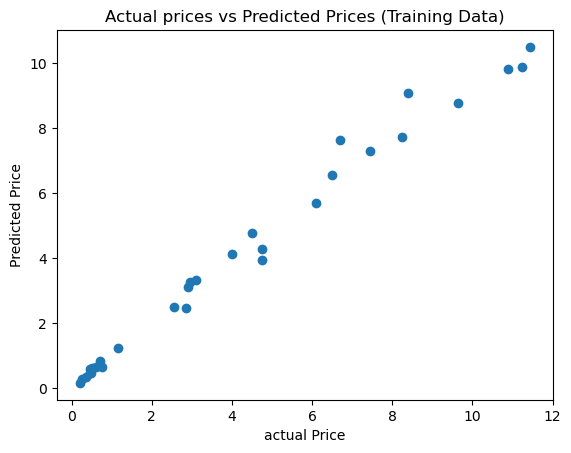

In [158]:
plt.scatter(Y_test, test_data_prediction1)
plt.xlabel("actual Price")
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted Prices (Training Data)')
plt.show()